In [1]:
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:\\Users\\Intes\\Desktop\\coding test\\data.csv")

In [3]:
data.head()

,Unnamed: 0,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,0,130,111,5000,21,27,13495.0
1,1,130,111,5000,21,27,16500.0
2,2,152,154,5000,19,26,16500.0
3,3,109,102,5500,24,30,13950.0
4,4,136,115,5500,18,22,17450.0


In [4]:
data.drop(columns='Unnamed: 0', inplace=True)

In [5]:
data.head()

,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,130,111,5000,21,27,13495.0
1,130,111,5000,21,27,16500.0
2,152,154,5000,19,26,16500.0
3,109,102,5500,24,30,13950.0
4,136,115,5500,18,22,17450.0


In [6]:
y = data['price']

In [7]:
data.drop(columns='price', inplace=True)


In [8]:
x= data

In [9]:
x.head()

,enginesize,horsepower,peakrpm,citympg,highwaympg
0,130,111,5000,21,27
1,130,111,5000,21,27
2,152,154,5000,19,26
3,109,102,5500,24,30
4,136,115,5500,18,22


In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.2)

In [11]:
x_train.shape

(164, 5)

In [12]:
x_test.shape

(41, 5)

In [13]:
y_train.shape

(164,)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
def eval_metric(actual, pred):
    import numpy as np
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [17]:
# Setting the seed to avoid changes due to randomness
seed = 42
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim=x_train.shape[1]))
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 1,129
Trainable params: 1,129
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x= x_train,y=y_train,validation_split = 0.2, batch_size=32,epochs= 100 )

Epoch 1/100
5/5 [==============================] - 2s 49ms/step - loss: 213463360.0000 - val_loss: 317923168.0000
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 213457344.0000 - val_loss: 317912544.0000
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 213450112.0000 - val_loss: 317900992.0000
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 213442496.0000 - val_loss: 317887712.0000
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 213433840.0000 - val_loss: 317872992.0000
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 213423776.0000 - val_loss: 317857088.0000
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 213413056.0000 - val_loss: 317838656.0000
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 213399984.0000 - val_loss: 317817536.0000
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 213384768.0000 - val

In [20]:
history = pd.DataFrame(model.history.history)

<function matplotlib.pyplot.show(close=None, block=None)>

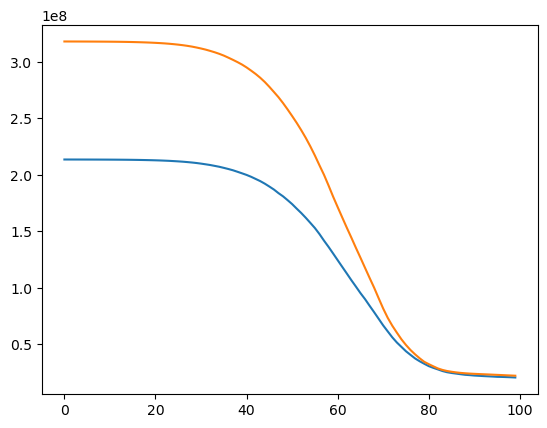

In [21]:
import matplotlib.pyplot as plt
plt.plot(history)
plt.show

In [22]:
y_pred = model.predict(x_test)

In [23]:
eval_metric(y_test, y_pred)

r2_score: 0.6299438880427495 
mae: 3998.156511814024 
mse: 29213717.428998128 
rmse: 5404.971547473504


In [28]:
import cv2
import numpy as np
from PIL import Image
from numpy import asarray
def preprocess_image(img):
    # img = asarray(img)
    assert img is not None, "file could not be read, check with os.path.exists()"
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(img,-1,kernel)
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    #          --- Edge Detection Part ---
    
    # I used the Sobel filter to do this part. 
    # The Sobel filter consists of two separate filters: 
    # one for detecting horizontal edges and the other for detecting vertical edges. 
    # These filters are applied to the image by convolving them with the image pixels. 
    # The resulting filtered images are then combined to obtain the magnitude and direction of the edges.
    

    
    # Convert to graycsale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
    
    # Sobel Edge Detection
    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
    # Display Sobel Edge Detection Images
    sobelx_r= cv2.resize(sobelx, (400, 400))
    cv2.imshow('Sobel X', sobelx_r)
    
    cv2.waitKey(0)
    sobely_r=cv2.resize(sobely, (400, 400))
    cv2.imshow('Sobel Y', sobely_r)
    
    cv2.waitKey(0)
    sobelxy_r=cv2.resize(sobelxy, (400, 400))
    cv2.imshow('Sobel X Y using Sobel() function', sobelxy_r)
    
    cv2.waitKey(0)
    
    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
    # Display Canny Edge Detection Image
    cv2.imshow('Canny Edge Detection', edges)
    cv2.waitKey(0)
    
    cv2.destroyAllWindows()

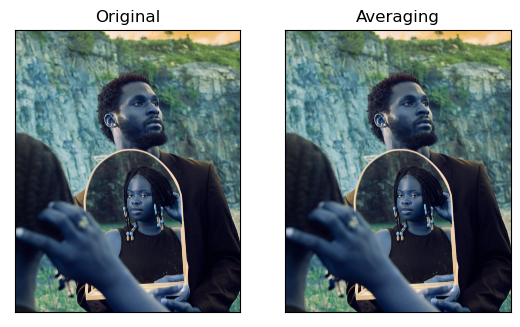

In [29]:
img = cv2.imread("C:\\Users\\Intes\\Desktop\\coding test\\image.jpg")
preprocess_image(img)